In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
laliga = pd.read_csv("C:/FMEL_Dataset.csv")

In [21]:
print (laliga.info())
"""Chequeo si hay valores nulos en el dataset"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36652 entries, 0 to 36651
Data columns (total 10 columns):
id              36652 non-null int64
season          36652 non-null object
division        36652 non-null int64
round           36652 non-null int64
localTeam       36652 non-null object
visitorTeam     36652 non-null object
localGoals      36652 non-null int64
visitorGoals    36652 non-null int64
date            36652 non-null object
timestamp       36652 non-null int64
dtypes: int64(6), object(4)
memory usage: 2.8+ MB
None


'Chequeo si hay valores nulos en el dataset'

In [22]:
"""Solo analizaremos la primera división"""
laliga = laliga[laliga["division"]==1]

In [47]:
"""Siempre se dice que el equipo de casa tiene la ventaja, analizamos si los resultados avalan este decir creando una nueva
columna con las victorias por equipo"""
laliga['ganador'] = 'empate'
laliga.loc[laliga['localGoals'] > laliga['visitorGoals'], 'ganador'] = 'local'
laliga.loc[laliga['visitorGoals'] > laliga['localGoals'], 'ganador'] = 'visitante'
laliga.groupby('ganador')['ganador'].count()

ganador
empate       4382
local        8769
visitante    3788
Name: ganador, dtype: int64

'Podemos observar, que efectivamente, jugar en casa tiene un factor a la hora del resultado'

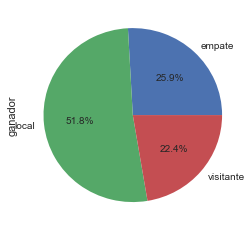

In [26]:
laliga.groupby('ganador')['ganador'].count().plot(kind='pie', autopct='%1.1f%%', figsize=(4,4))
"""Podemos observar, que efectivamente, jugar en casa tiene un factor a la hora del resultado"""


In [28]:
"""Podemos analizar los goles totales por partido"""
laliga['GolesTotales'] = laliga['visitorGoals'] + laliga['localGoals']

'Vemos que al pasar el tiempo, la cantidad de goles por partido va creciendo'

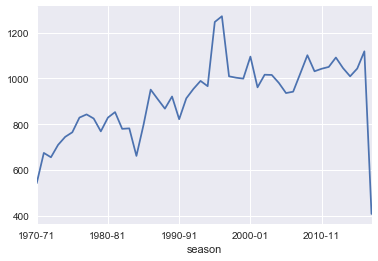

In [32]:
laliga.groupby('season')['GolesTotales'].sum().plot()
"""Vemos que al pasar el tiempo, la cantidad de goles por partido va creciendo"""

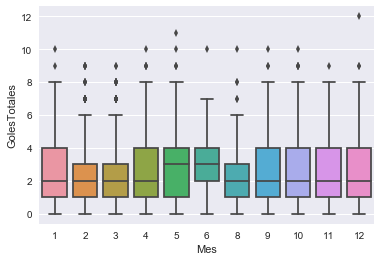

In [37]:
"""Tiene algo que ver el mes con la cantidad de goles por partido?"""
laliga['Fecha'] = pd.to_datetime(laliga['date'], format='%d/%m/%Y')
laliga['Mes'] = laliga['Fecha'].dt.month
laliga['Dia'] = laliga['Fecha'].dt.weekday
# Higher scoring games leading up to end of season
sns.boxplot(x='Mes', y='GolesTotales', data=laliga)

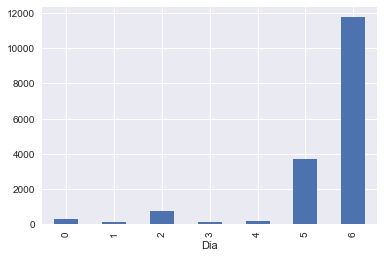

In [39]:
"""Qué días se juega la mayoria de partidos de La Liga?"""
laliga.groupby('Dia')['round'].count().plot(kind='bar')

In [48]:
"""Que equipos tienen mejor promedio como local y visitantes?"""
laliga = laliga.merge(pd.get_dummies(laliga['ganador']), left_index=True, right_index=True)
laliga['VictoriasLocalesPorSeason'] = laliga.groupby(['season','localTeam'])['local'].transform('sum')
laliga['VictoriasVisitantesPorSeason'] = laliga.groupby(['season','visitorTeam'])['visitante'].transform('sum')

In [50]:
(
    laliga.groupby(['localTeam'])['VictoriasLocalesPorSeason']
    .agg(['count','mean'])
    .sort_values(ascending=False, by='mean')
    .round(1)
    .head(10)
)
"""El Real Madrid tiene mejor promedio como Local"""

'El Real Madrid tiene mejor promedio como Local'

In [51]:
(
    laliga.groupby(['visitorTeam'])['VictoriasVisitantesPorSeason']
    .agg(['count','mean'])
    .sort_values(ascending=False, by='mean')
    .round(1)
    .head(10)
)
"""El Real Madrid tiene mejor promedio como Visitante"""

,count,mean
visitorTeam,,
Real Madrid,873,8.3
Barcelona,874,8.0
Atletico de Madrid,837,5.8
Villarreal,331,5.3
Valencia,851,5.3
Deportivo,501,5.1
Malaga,312,4.5
Alaves,140,4.4
Sevilla,766,4.4


In [55]:
"""Hacemos 3 nuevas columnas para ver las victorias como local y visitante y totales por temporada y las enviamos a un nuevo dataframe """
visitor_results = (laliga
                   .groupby(['season', 'visitorTeam'])['visitante']
                   .sum()
                   .reset_index()
                   .rename(columns={'visitorTeam': 'team',
                                    'visitante': 'visitor_wins'}))

local_results = (laliga
                 .groupby(['season', 'localTeam'])['local']
                 .sum()
                 .reset_index()
                 .rename(columns={'localTeam': 'team',
                                  'local': 'local_wins'}))

VictoriasperSeason = visitor_results.merge(local_results, on=['season', 'team'])

VictoriasperSeason['total_wins'] = VictoriasperSeason['visitor_wins'] + VictoriasperSeason['local_wins']

,season,team,visitor_wins,local_wins,total_wins
0,1970-71,Athletic Club,3,11,14
1,1970-71,Atletico de Madrid,4,13,17
2,1970-71,Barcelona,8,11,19
3,1970-71,CD Malaga,2,6,8
4,1970-71,Celta de Vigo,3,12,15
